# DecisionTree for Classification 

# Problem statement

Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image.

In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading the dataset

In [4]:
bill_data = pd.read_csv('bill_authentication.csv')
bill_data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# Data Analysis

In [6]:
bill_data.shape

(1372, 5)

In [7]:
bill_data.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
bill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
bill_data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

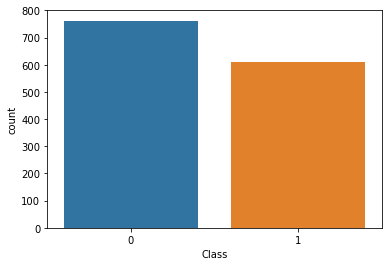

In [10]:
sns.countplot(bill_data.Class)

In [13]:
bill_data.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

/Users/a/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/a/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


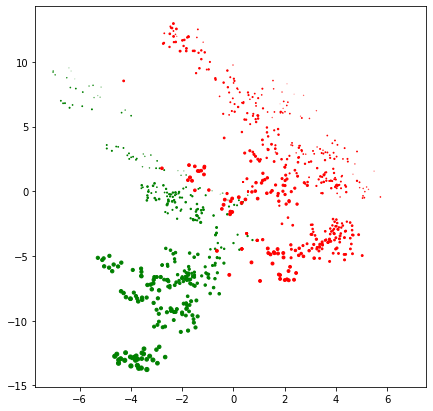

In [14]:
plt.figure(figsize=(7, 7))
ax = plt.subplot()
ax.scatter(bill_data[bill_data['Class'] == 1]['Variance'], bill_data[bill_data['Class'] == 1]['Skewness'], c='green', s=bill_data[bill_data['Class'] == 1]['Curtosis'])
ax.scatter(bill_data[bill_data['Class'] == 0]['Variance'], bill_data[bill_data['Class'] == 0]['Skewness'], c='red', s=bill_data[bill_data['Class'] == 0]['Curtosis']);


In [15]:
# Split the data

In [16]:
X = bill_data.drop('Class', axis = 1)
y = bill_data['Class']


In [17]:
# Splitting to train and test data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier  
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train)  

DecisionTreeClassifier()

In [20]:
y_pred = dtc.predict(X_test)


## Evaluating the Algorithm

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy : ",accuracy_score(y_test, y_pred))

Accuracy :  0.9927272727272727


In [23]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


[[155   2]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

